<a href="https://colab.research.google.com/github/YonghwanYim/Applied_Artificial_Intelligence/blob/master/2018_11_19_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Google Drive 연동, 파일 생성**

In [0]:
!pip install -U -q PyDrive # Google Drive 인증
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [8]:
# mnist.py
temp = drive.CreateFile({'id' : '1hPFSjrJOnbuWtSZguJy-tNgsq0nlGs64'}) # Generate File
temp.GetContentFile('mnist.py') # Rename
# functions.py
temp = drive.CreateFile({'id' : '1QMzKrvnRBH-AbvnUJhB4MJYldhzUt2tY'}) # Generate File
temp.GetContentFile('functions.py') # Rename
# gradient.py
temp = drive.CreateFile({'id' : '1-fV8DtnDHd-evmHGDOBNiNZWxW-YK4v1'}) # Generate File
temp.GetContentFile('gradient.py') # Rename
# layers.py
temp = drive.CreateFile({'id' : '1tEvPr0PVrWF2wOrfWyNEKstNibn5LJMd'}) # Generate File
temp.GetContentFile('layers.py') # Rename
# multilayernet.py
temp = drive.CreateFile({'id' : '1Ft_iIP9WVejT5YgbQnX6lkudpY-XHKQZ'}) # Generate File
temp.GetContentFile('multilayernet.py') # Rename
# multilayernetextend.py
temp = drive.CreateFile({'id' : '1-fM0bu1aAPtx0se-biRJzSv-v9WgahDh'}) # Generate File
temp.GetContentFile('multilayernetextend.py') # Rename
# optimizer.py
temp = drive.CreateFile({'id' : '1EGIbur6m0_mklzqKV-tiszOupE_SrCMX'}) # Generate File
temp.GetContentFile('optimizer.py') # Rename
# trainer.py
temp = drive.CreateFile({'id' : '1PPDabIzpLbmLHBzQ1suW006hTyOxU-Bi'}) # Generate File
temp.GetContentFile('trainer.py') # Rename
# util.py
temp = drive.CreateFile({'id' : '1t-3l-Kj2FAIHaH0yCGnhXx5tZnZ_Hy8H'}) # Generate File
temp.GetContentFile('util.py') # Rename

!ls # 생성된 파일 확인

adc.json      layers.py		      multilayernet.py	trainer.py
functions.py  mnist.py		      optimizer.py	util.py
gradient.py   multilayernetextend.py  sample_data


# Overfitting 재현

epoch:0, train acc:0.121, test acc:0.1111
epoch:1, train acc:0.23133333333333334, test acc:0.2247
epoch:2, train acc:0.3233333333333333, test acc:0.3092
epoch:3, train acc:0.37733333333333335, test acc:0.3627
epoch:4, train acc:0.44266666666666665, test acc:0.4289
epoch:5, train acc:0.5033333333333333, test acc:0.477
epoch:6, train acc:0.5663333333333334, test acc:0.5293
epoch:7, train acc:0.62, test acc:0.5888
epoch:8, train acc:0.6646666666666666, test acc:0.637
epoch:9, train acc:0.6863333333333334, test acc:0.6706
epoch:10, train acc:0.7183333333333334, test acc:0.7038
epoch:11, train acc:0.7236666666666667, test acc:0.7043
epoch:12, train acc:0.7463333333333333, test acc:0.7301
epoch:13, train acc:0.7476666666666667, test acc:0.7366
epoch:14, train acc:0.7566666666666667, test acc:0.7469
epoch:15, train acc:0.7683333333333333, test acc:0.7571
epoch:16, train acc:0.7763333333333333, test acc:0.7608
epoch:17, train acc:0.772, test acc:0.7592
epoch:18, train acc:0.779, test acc:0.762

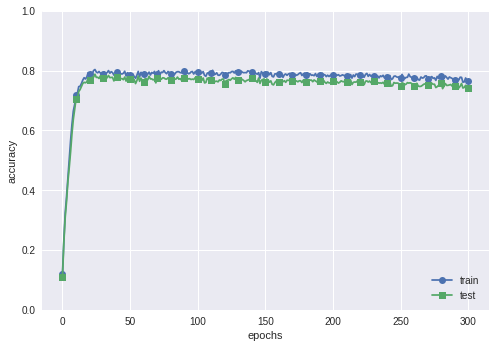

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from optimizer import SGD
from multilayernet import MultiLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:3000] # 300
t_train = t_train[:3000] # 300

# weight decay
#weight_decay_lambda = 0 
weight_decay_lambda = 0.1

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 301
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# **Dropout**

train loss:2.3423324041535114
=== epoch:1, train acc:0.12666666666666668, test acc:0.1065 ===
train loss:2.3500327244424666
train loss:2.2857903496078356
train loss:2.3083654255532027
=== epoch:2, train acc:0.13666666666666666, test acc:0.1133 ===
train loss:2.286155235768705
train loss:2.2934240765011267
train loss:2.2069809604545845
=== epoch:3, train acc:0.16666666666666666, test acc:0.1238 ===
train loss:2.2139267434867325
train loss:2.25764713298665
train loss:2.213401156804911
=== epoch:4, train acc:0.21333333333333335, test acc:0.1396 ===
train loss:2.217329482794252
train loss:2.211552396519857
train loss:2.171019414515633
=== epoch:5, train acc:0.23666666666666666, test acc:0.1584 ===
train loss:2.1920868964110967
train loss:2.1863502512866435
train loss:2.131574603345305
=== epoch:6, train acc:0.28, test acc:0.1788 ===
train loss:2.097004766279973
train loss:2.126804196986239
train loss:2.153269901460138
=== epoch:7, train acc:0.32666666666666666, test acc:0.1988 ===
train lo

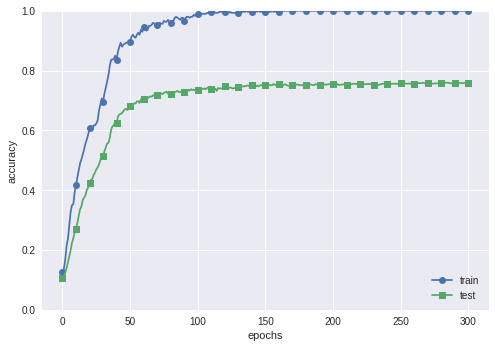

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from multilayernetextend import MultiLayerNetExtend
from trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)


x_train = x_train[:300]
t_train = t_train[:300]

# Dropuout
use_dropout = False  # True or False
dropout_ratio = 0.2


network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list


markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# **Hyper Parameter 최적화**

val acc:0.11 | lr:0.00029629293974179754, weight decay:1.426458032107492e-07
val acc:0.09 | lr:0.00011745592100510616, weight decay:1.2408099139274607e-07
val acc:0.07 | lr:5.708063816856078e-06, weight decay:1.825338298459543e-08
val acc:0.31 | lr:0.0017294537548538853, weight decay:5.661189173500993e-05
val acc:0.25 | lr:0.0014659974603497996, weight decay:6.945955470045539e-08
val acc:0.09 | lr:2.0007018868932102e-06, weight decay:1.4049996728584546e-05
val acc:0.09 | lr:2.805025408718079e-06, weight decay:3.473616142988701e-06
val acc:0.81 | lr:0.009080697260761975, weight decay:1.3443987684335723e-08
val acc:0.06 | lr:2.1805133787052636e-05, weight decay:2.1738687276396505e-08
val acc:0.14 | lr:9.04487492907132e-05, weight decay:1.07249754134563e-08
val acc:0.13 | lr:1.8069092510364472e-06, weight decay:1.2447494115663632e-06
val acc:0.35 | lr:0.0022326591986837237, weight decay:2.700753949820435e-05
val acc:0.05 | lr:3.404146607361707e-05, weight decay:7.58814711283896e-07
val ac

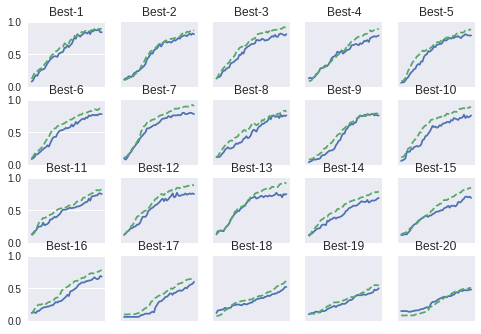

In [18]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from multilayernet import MultiLayerNet
from util import shuffle_dataset
from trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)


x_train = x_train[:500]
t_train = t_train[:500]


validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list



optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
   
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
  

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list


print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()
